<a href="https://colab.research.google.com/github/Bibek0130/machine_learning/blob/main/Nepali_character.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets
import opendatasets as od
import pandas


od.download("https://www.kaggle.com/datasets/inspiring-lab/nepali-number-plate-characters-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: bibekmainali01
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/inspiring-lab/nepali-number-plate-characters-dataset


100%|██████████| 31.6M/31.6M [00:00<00:00, 63.3MB/s]


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image

import os
import cv2
from google.colab.patches import cv2_imshow

from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

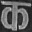

In [ ]:
# Define the path to the image
image_path = 'nepali-number-plate-characters-dataset/character_ocr/क/क_219.jpg'

# Open the image
image = cv2.imread(image_path)
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
main_path='nepali-number-plate-characters-dataset/character_ocr'
dataset=pd.DataFrame()
for x in os.listdir(main_path):
    df=pd.DataFrame({'imgs':os.listdir(f'{main_path}/{x}')})
    df['target']=x
    dataset=pd.concat([dataset,df])


In [ ]:
dataset['imgs']='nepali-number-plate-characters-dataset/character_ocr/'+dataset['target']+'/'+dataset['imgs']

In [ ]:
encoded={y:x for x,y in enumerate(dataset.target.unique()) }
decoded=dict(enumerate(dataset.target.unique()))

In [ ]:
def image_data_gen(path):
    im=cv2.imread(path)
    return cv2.resize(im,(32,32))



In [ ]:
dataset['target_encoded']=dataset['target'].map(encoded)

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(dataset['imgs'],dataset['target_encoded'],stratify=dataset['target_encoded'])

In [ ]:
train_imgs=list(map(image_data_gen,train_x.tolist()))
test_imgs=list(map(image_data_gen,test_x.tolist()))

In [ ]:
train_imgs=np.stack(train_imgs)
test_imgs=np.stack(test_imgs)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [ ]:
model=Sequential([

    Conv2D(64,(3,3),input_shape=(32,32,3),activation='relu'),
    MaxPool2D(),

    Conv2D(32,(2,2),activation='relu'),
    MaxPool2D(),

    Flatten(),

    Dense(50,activation='relu'),
    Dropout(.12),
    Dense(44,activation='relu'),
    Dense(34,activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          78,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 44)                  │           2,244 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 34)                  │           1,530 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,240 (360.31 KB)

 Trainable params: 92,240 (360.31 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(train_imgs,np.array(train_y),batch_size=128,epochs=20)

Epoch 1/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.1250 - loss: 9.0326
Epoch 2/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6044 - loss: 1.4473
Epoch 3/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7573 - loss: 0.8655
Epoch 4/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8182 - loss: 0.6411
Epoch 5/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8592 - loss: 0.5033
Epoch 6/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8821 - loss: 0.4236
Epoch 7/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9028 - loss: 0.3590
Epoch 8/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9100 - loss: 0.3129
Epoch 9/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9168 - loss: 0.3024
Epoch 10/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9240 - loss: 0.2655
Epoch 11/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9282 - loss: 0.2496
Epoch 12/20
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

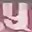

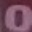

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


['५', '०']

In [ ]:
im=cv2.imread('nepali-number-plate-characters-dataset/character_ocr/५/५_0.jpg')
cv2_imshow(im)
im1=cv2.imread('nepali-number-plate-characters-dataset/character_ocr/०/०_450.jpg')
cv2_imshow(im1)
inp=np.stack([im,im1])
ans=model.predict(inp)
ans=np.argmax(ans,axis=1)
[decoded[x] for x in ans]

In [ ]:
ans=model.predict(test_imgs)

208/208 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [ ]:
ans=np.argmax(ans,axis=1)

In [ ]:
print(classification_report(test_y,ans))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       250
           1       0.93      0.96      0.95       117
           2       0.97      0.94      0.95       225
           3       0.97      0.97      0.97       215
           4       0.98      0.96      0.97       250
           5       0.93      0.95      0.94       250
           6       0.96      0.98      0.97       227
           7       0.99      0.97      0.98       146
           8       0.98      0.94      0.96       231
           9       0.97      0.99      0.98       250
          10       0.96      0.99      0.98       211
          11       0.99      0.97      0.98       204
          12       0.99      0.97      0.98       192
          13       1.00      0.99      0.99        94
          14       0.95      0.98      0.96       211
          15       1.00      1.00      1.00       197
          16       0.99      0.95      0.97       215
          17       0.96    

In [ ]:
print(accuracy_score(test_y,ans))

0.9716654107008289
